# Modélisation de l'Algorithme de Google

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
import networkx as nx
from tabulate import tabulate

## I- Construction des matrices et vecteurs

In [2]:
def adj_matrix(dico) : 
    """
    renvoie la matrice d'adjacence d'un graphe
    """
    C = []
    for j in range(len(dico)) : 
        C.append([])
        for i in range(len(dico)) :
            if str(j+1) in dico[str(i+1)] : 
                C[j].append(1.)
            else :
                C[j].append(0.)
    return np.array(C)

In [3]:
def test() :
    G = dict()
    G['1'] = ['2', '4']
    G['2'] = ['3', '4']
    G['3'] = ['1']
    G['4'] = ['2']
    return G

adj_matrix(test())
#on voit bien que 3 pointe sur 1, donc on est bon !

array([[0., 0., 1., 0.],
       [1., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 1., 0., 0.]])

In [4]:
#je crée la matrice Q à partir de la matrice C 
def matrixQ(matrixC) : 
    """
    creation de la matrice Q
    """
    N = matrixC.shape[0]
    Q = matrixC.copy()
    d = np.zeros((N,1))
    for j in range(N) : 
        Nj = 0
        for k in range(N) :
            Nj += matrixC[k][j]
        for i in range(N) : 
            if Nj == 0 : 
                Q[i][j] = 0
                d[j] = 1
                
            else :
                Q[i][j] = Q[i][j]/Nj
    return Q,d
            

In [5]:
#je crée toutes les autres matrices, relatives au graphe
def constructions_matrix(graph) : 
    """
    je recupere que la matrice A,Q et le vecteur e, seuls eux sont utiles pour la suite
    """
    N = len(graph)
    e = np.ones(N)
    e = e.reshape(N,1) #necessaire sinon erreur car la shape ne correspond pas
    C = adj_matrix(graph)
    Q,d = matrixQ(C)
    P = Q + 1/N * e @ d.T
    A = 0.85 * P + (1-0.85)/N * e @ e.T
    
    return Q,A,e


## II- Méthode la puissance

### Première version

In [6]:
def power_method(Q,e, tol=1.e-4, alpha=0.85) :
    """
    méthode de la puissance
    """
    N = Q.shape[0]
    s = 1 #comment définir s au début ?
    r = np.random.rand(N) #créer une fct qui crée un vecteur aleatoire ?
    r = r.reshape(N,1)
    rnormalised = r/np.linalg.norm(r)
    i = 0
    while s >= tol :
        l = alpha * (Q @ rnormalised)
        beta = 1 - np.linalg.norm(l)
        k = l + beta/N * e
        s = np.linalg.norm(k-rnormalised)
        rnormalised = k
        i +=1
    return rnormalised,i
    
    
#verifier que le vecteur propre obtenu est associé à la valeur propre 1 OK

### Dexuième version

In [7]:
def convergence(x, xn, tol):
    error = np.linalg.norm(xn - x)
    return error < tol, error

In [8]:
def power_method_2(A, max_iter = 1000, tol = 1e-6, nb_iterations = True):
    """
    Calcule la valeur propre dominante et le vecteur propre correspondant d'une matrice carrée A.

    Args:
        A : numpy.ndarray
            Matrice carrée.
        max_iter : int, optionnel (par défaut : 1000)
            Nombre maximal d'itérations.
        tol : float, optionnel (par défaut : 1e-6)
            Tolérance pour le critère de convergence.

    Returns:
        val_propre : float
            Valeur propre dominante.
        vecteur_propre : numpy.ndarray
            Vecteur propre correspondant.
        Xf : numpy.ndarray
            Historique des vecteurs propres à chaque itération (ancien).
        Xs : numpy.ndarray
            Historique des vecteurs propres à chaque itération (nouveau).
        k : int
            Nombre total d'itérations effectuées.
    """
    
    if A.shape[0] != A.shape[1]:
        raise ValueError("La matrice doit être carrée.")
        
    n = len(A)
    cv = False
    x_old = np.zeros(n)
    x = np.random.rand(n)
    error_old = None
    Xf, Xs = [],[]
    k = 0

    while k>=0:
        
        Ax = A @ x
        xn = Ax / np.linalg.norm(Ax)
        x_old = x
        x = xn
        
        cv, error = convergence(x_old, xn, tol)
        if cv:
            if nb_iterations:
                print()
                print(f"Convergence atteinte après {k} itérations.\n")
            break
        
        Xf.append(x_old)
        Xs.append(x)
        k+=1 
        
    val_propre = x @ A @ x
     
    Xf = [np.linalg.norm(v - x) for v in Xf]
    Xs = [np.linalg.norm(v - x) for v in Xs]
    
    return val_propre, x, np.array(Xf), np.array(Xs), k

## III- Construction des différents graphes et quelques remarques

### 1. Graphe classique de petite taille

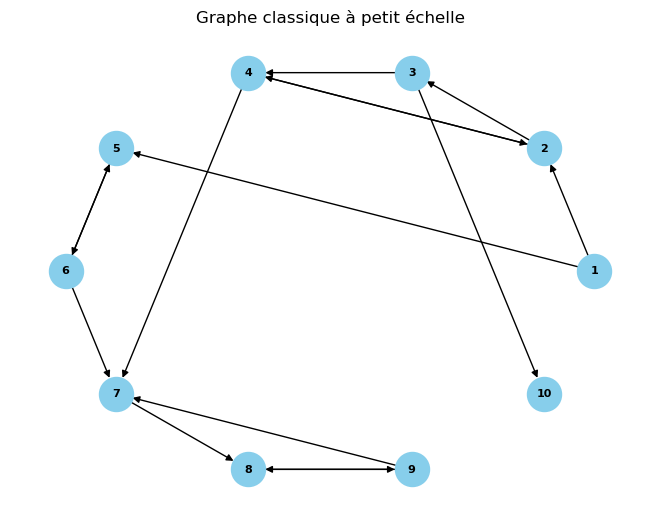

In [9]:
#notre graphe 
def graph_classic() : 
    G = dict()
    G['1'] = ['2', '5']
    G['2'] = ['3', '4']
    G['3'] = ['4','10']
    G['4'] = ['2','7']
    G['5'] = ['6']
    G['6'] = ['5', '7']
    G['7'] = ['8']
    G['8'] = ['9']
    G['9'] = ['7', '8']
    G['10'] = []
    return G

# Création d'un graphe orienté
G = nx.DiGraph(graph_classic())


# Dessin du graphe
pos = nx.circular_layout(G)  # Positionnement des nœuds
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=600, node_color='skyblue', font_color='black', font_size=8)
plt.title('Graphe classique à petit échelle')
plt.show()

In [10]:
Q,A,e = constructions_matrix(graph_classic())

In [11]:
V,it = power_method(Q,e) #on appelle la méthode la puissance
print(f"Convergence au bout de {it} itérations")
print("Le vecteur trouvé V : ")
print(V)
print("Le produit matrice vecteur AV : ")
print(A@V)

#on voit que Av = v à epsilon près, alors on est satisfait !

Convergence au bout de 18 itérations
Le vecteur trouvé V : 
[[0.03189382]
 [0.08724059]
 [0.06898056]
 [0.09830388]
 [0.09238061]
 [0.11046134]
 [0.30775695]
 [0.48060079]
 [0.44038671]
 [0.06121714]]
Le produit matrice vecteur AV : 
[[0.03189179]
 [0.08722581]
 [0.06896904]
 [0.09828578]
 [0.09239274]
 [0.11041531]
 [0.30778136]
 [0.48064955]
 [0.44040246]
 [0.06120853]]


### 2. Graphe en étoile

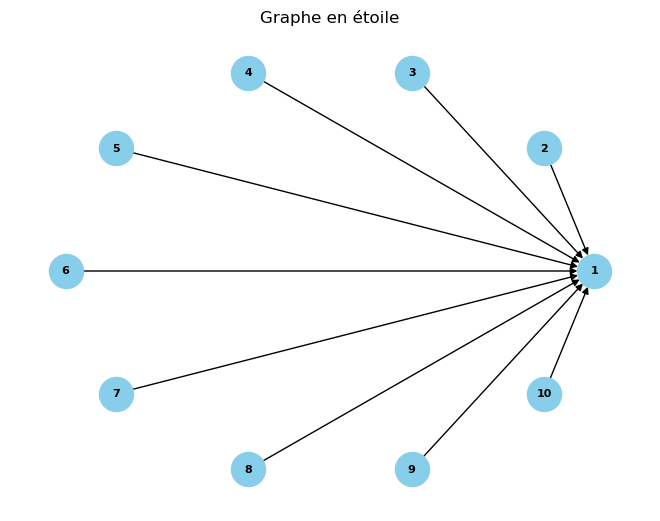

In [12]:
def graph_star() : 
    G = dict()
    G['1'] = []
    G['2'] = ['1']
    G['3'] = ['1']
    G['4'] = ['1']
    G['5'] = ['1']
    G['6'] = ['1']
    G['7'] = ['1']
    G['8'] = ['1']
    G['9'] = ['1']
    G['10'] = ['1']
    return G

G = nx.DiGraph(graph_star())
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=600, node_color='skyblue', font_color='black', font_size=8)
plt.title('Graphe en étoile')
plt.show()

### 3. Graphe en étoile amélioré

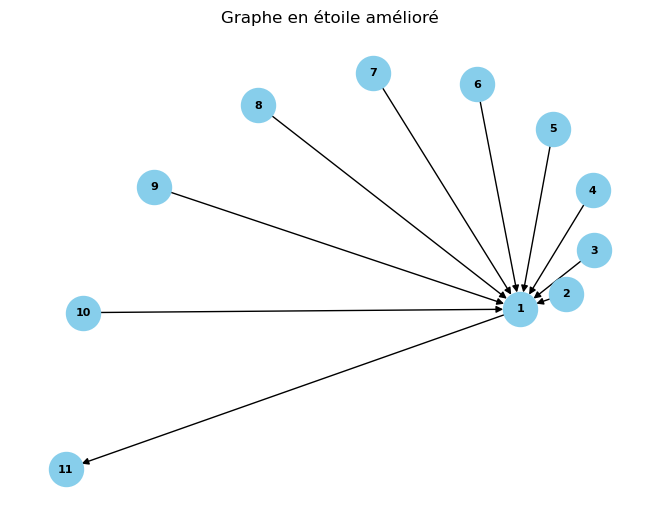

In [13]:
#ici on a rajouté un noeud fils au noeud 1

def graph_star_plus() : 
    G = dict()
    G['1'] = ['11']
    G['2'] = ['1']
    G['3'] = ['1']
    G['4'] = ['1']
    G['5'] = ['1']
    G['6'] = ['1']
    G['7'] = ['1']
    G['8'] = ['1']
    G['9'] = ['1']
    G['10'] = ['1']
    G['11'] = []
    return G

G = nx.DiGraph(graph_star_plus())
pos = nx.spiral_layout(G) 
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=600, node_color='skyblue', font_color='black', font_size=8)
plt.title('Graphe en étoile amélioré')
plt.show()

In [14]:
Q,A,e = constructions_matrix(graph_star_plus())
V,it = power_method(Q,e)
print(f"Convergence au bout de {it} itérations")
print("le vecteur trouvé V : ")
print(V)
print("le score de la page 1 et de la page 11")
print(V[0],V[10])

Convergence au bout de 23 itérations
le vecteur trouvé V : 
[[0.40022782]
 [0.04627642]
 [0.04627642]
 [0.04627642]
 [0.04627642]
 [0.04627642]
 [0.04627642]
 [0.04627642]
 [0.04627642]
 [0.04627642]
 [0.38651097]]
le score de la page 1 et de la page 11
[0.40022782] [0.38651097]


### 4. Graphe cyclique

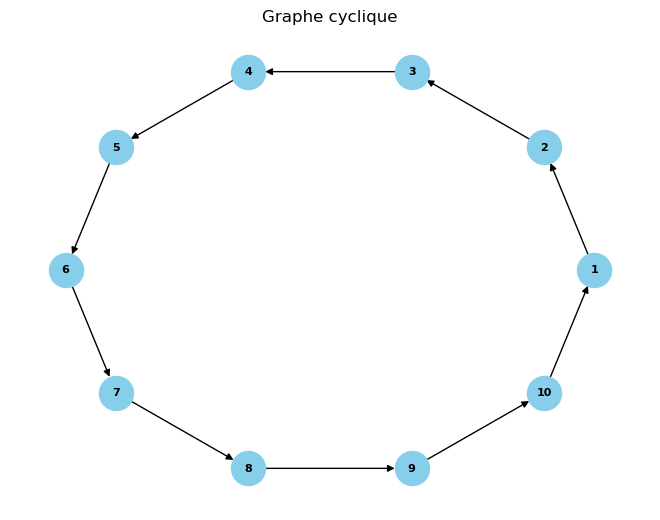

In [15]:
def graph_circle() : 
    G = dict()
    G['1'] = ['2']
    G['2'] = ['3']
    G['3'] = ['4']
    G['4'] = ['5']
    G['5'] = ['6']
    G['6'] = ['7']
    G['7'] = ['8']
    G['8'] = ['9']
    G['9'] = ['10']
    G['10'] = ['1']
    return G
G = nx.DiGraph(graph_circle())
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=600, node_color='skyblue', font_color='black', font_size=8)
plt.title('Graphe cyclique')
plt.show()

### 5. Petit graphe complet

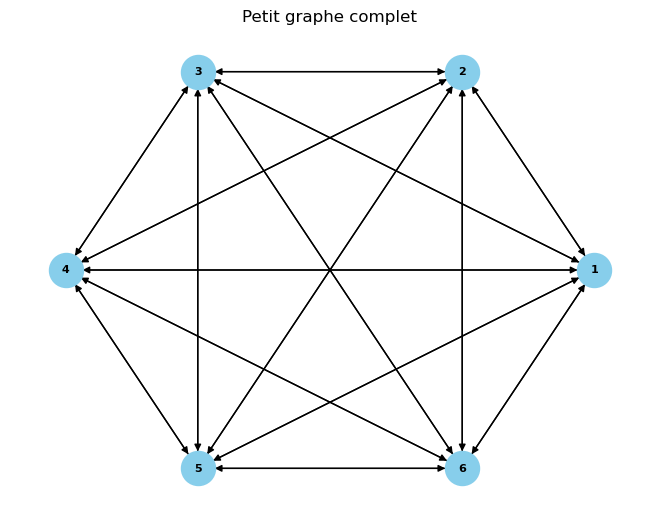

In [16]:
def graph_complete_small() : 
    G = dict()
    G['1'] = ['2','3','4','5','6']
    G['2'] = ['1','3','4','5','6']
    G['3'] = ['1','2','4','5','6']
    G['4'] = ['1','2','3','5','6']
    G['5'] = ['1','2','3','4','6']
    G['6'] = ['1','2','3','4','5']
    return G
G = nx.DiGraph(graph_complete_small())
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=600, node_color='skyblue', font_color='black', font_size=8)
plt.title('Petit graphe complet')
plt.show()

### 6. Grand graphe complet

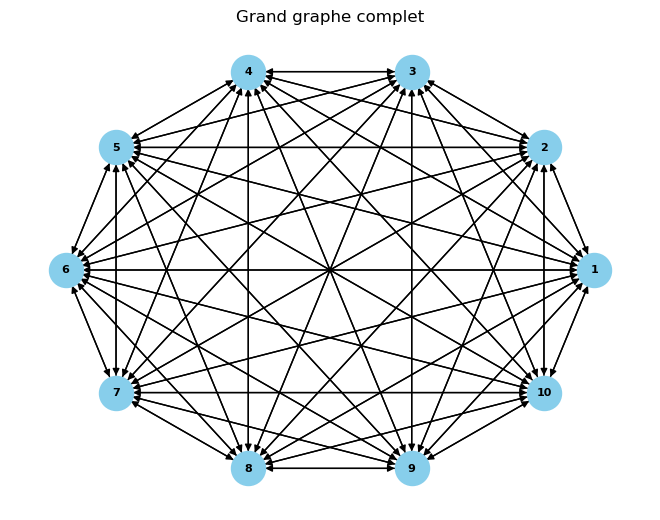

In [17]:
def graph_complete_big() : 
    G = dict()
    G['1'] = ['2','3','4','5','6','7','8','9','10']
    G['2'] = ['1','3','4','5','6','7','8','9','10']
    G['3'] = ['1','2','4','5','6','7','8','9','10']
    G['4'] = ['1','2','3','5','6','7','8','9','10']
    G['5'] = ['1','2','3','4','6','7','8','9','10']
    G['6'] = ['1','2','3','4','5','7','8','9','10']
    G['7'] = ['1','2','3','4','5','6','8','9','10']
    G['8'] = ['1','2','3','4','5','6','7','9','10']
    G['9'] = ['1','2','3','4','5','6','7','8','10']
    G['10'] = ['1','2','3','4','5','6','7','8','9']
    return G

G = nx.DiGraph(graph_complete_big())
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=600, node_color='skyblue', font_color='black', font_size=8)
plt.title('Grand graphe complet')
plt.show()

### 7. Graphe coupé en deux parties

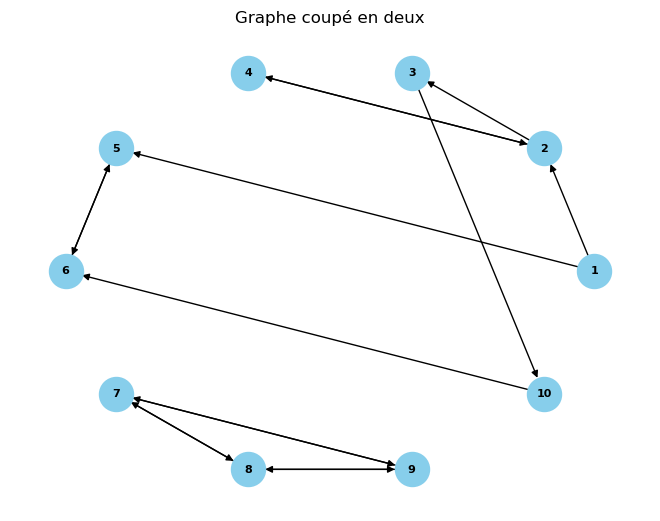

In [18]:
#permet de symboliser le fait qu'un utilisateur peut surfer aléatoirement et aller sur un page sans lien avec
#celle précédemment consultée
def graph_cut_in_two() : 
    G = dict()
    G['1'] = ['2', '5']
    G['2'] = ['3', '4']
    G['3'] = ['10']
    G['4'] = ['2']
    G['5'] = ['6']
    G['6'] = ['5']
    G['7'] = ['8', '9']
    G['8'] = ['7','9']
    G['9'] = ['7', '8']
    G['10'] = ['6']
    return G

G = nx.DiGraph(graph_cut_in_two())
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=600, node_color='skyblue', font_color='black', font_size=8)
plt.title('Graphe coupé en deux')
plt.show()

## IV- Etude de convergence

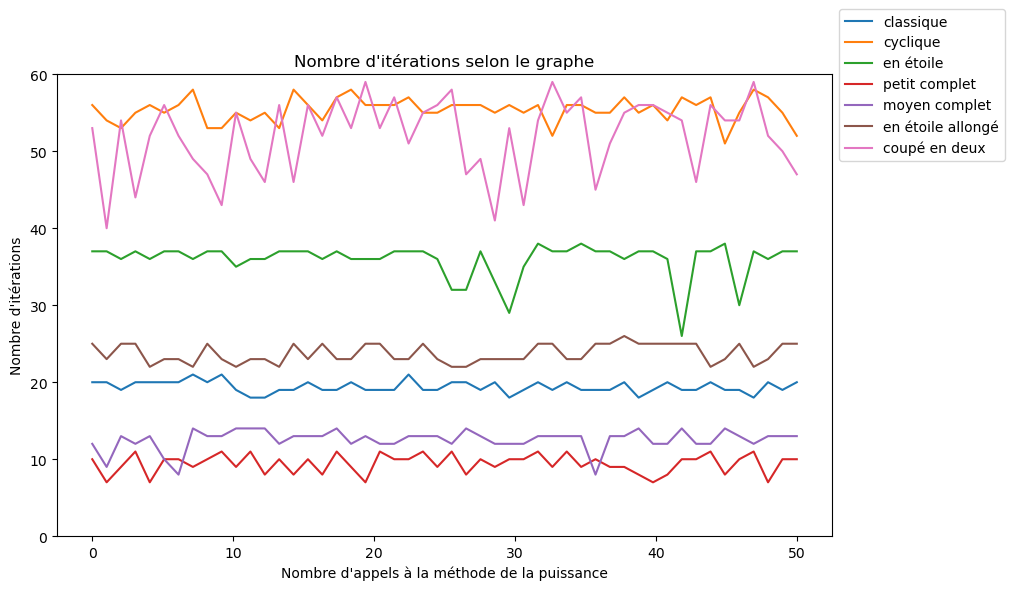

In [19]:
graph = [graph_classic(), graph_circle(), graph_star(), graph_complete_small(), graph_complete_big(), graph_star_plus(), graph_cut_in_two()]
nom = ["classique", "cyclique", "en étoile", "petit complet", "moyen complet", "en étoile allongé", "coupé en deux"]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
plt.ylim(0,60)

IT_mean = []
for k,g in enumerate(graph) : 
    nbre_it = np.ones(50)
    for i in range(50) : 
        Q,A,e = constructions_matrix(g)
        V, it = power_method(Q,e)
        nbre_it[i] *= it
    IT_mean.append(np.mean(nbre_it))
    t = np.linspace(0,50)
    ax.plot(t,nbre_it, label=f"{nom[k]}")
    ax.set_xlabel("Nombre d'appels à la méthode de la puissance")
    ax.set_ylabel("Nombre d'itérations")
    ax.set_title("Nombre d'itérations selon le graphe")
    
fig.legend(loc='upper left', bbox_to_anchor=(0.9, 1))
fig.show()


In [20]:
tab = []
for i in range(len(nom)) : 
    tab.append([nom[i], IT_mean[i]])


en_tete = ["Nom", "Moyenne d'itération"]

# Affichage du tableau formaté
table = tabulate(tab, en_tete, tablefmt="pretty")
print(table)

+-------------------+---------------------+
|        Nom        | Moyenne d'itération |
+-------------------+---------------------+
|     classique     |        19.4         |
|     cyclique      |        55.36        |
|     en étoile     |        35.92        |
|   petit complet   |        9.44         |
|   moyen complet   |        12.54        |
| en étoile allongé |        23.74        |
|   coupé en deux   |        51.94        |
+-------------------+---------------------+


#### On supprime le paramètre $\alpha$ (on pose $\alpha = 1$)

On se rend compte que notre algo est beaucoup trop lent poour les graphes cycliques et pour celui coupé en deux

In [21]:
graph = [graph_classic(), graph_circle(), graph_star(), graph_complete_small(), graph_complete_big(), graph_star_plus(), graph_cut_in_two()]
nom = ["classique", "cyclique", "en étoile", "petit complet", "moyen complet", "en étoile allongé", "coupé en deux"]

IT_mean = []
for k,g in enumerate(graph) :
    if (k!= 1) and (k!= 6): 
        nbre_it = np.ones(50)
        for i in range(50) : 
            Q,A,e = constructions_matrix(g)
            V, it = power_method(Q,e,1.e-4, 1)
            nbre_it[i] *= it
        IT_mean.append(np.mean(nbre_it))
    else : 
        IT_mean.append("nan")
    
tab = []
for i in range(len(nom)) : 
    tab.append([nom[i], IT_mean[i]])


en_tete = ["Nom", "Moyenne d'itération"]

# Affichage du tableau formaté
table = tabulate(tab, en_tete, tablefmt="pretty")
print(table)
    


+-------------------+---------------------+
|        Nom        | Moyenne d'itération |
+-------------------+---------------------+
|     classique     |        33.7         |
|     cyclique      |         nan         |
|     en étoile     |        79.3         |
|   petit complet   |        13.34        |
|   moyen complet   |        16.92        |
| en étoile allongé |        40.6         |
|   coupé en deux   |         nan         |
+-------------------+---------------------+


### V- Test avec une grande matrice 

Dans cette section du code, nous avons choisi de travailler directement avec des matrices plutôt qu'avec des graphes en raison de contraintes d'optimisation. Les dimensions impliquées sont très grandes, ce qui rendrait le calcul de la matrice à partir d'un graphe énorme impossible à stocker en mémoire. Cette limitation est également valable pour la version en nombres réels de la matrice, mais nous utilisons une matrice de grande taille pour évaluer l'efficacité de l'algorithme. Tout d'abord, nous apportons quelques modifications à la fonction de création de la matrice "A".

In [22]:
def correct_matrix(M, alpha): 
    """ Met la matrice sous la forme d'une matrice stochastique (la somme des éléments sur chaque colonne vaut 1).
    
    Args:
        M (numpy.ndarray): La matrice d'entrée.
        alpha (float): Le paramètre alpha pour ajuster la pondération entre la matrice originale et la matrice stochastique corrigée.

    Returns:
        numpy.ndarray: Une nouvelle matrice sous forme d'une matrice stochastique corrigée.

    Examples:
        # Exemple d'utilisation
        M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
        alpha = 0.5
        result = correct_matrix(M, alpha)
        print(result) 
    """
    sommes_colonnes = np.sum(M, axis=0)
    sommes_colonnes_copie = sommes_colonnes.copy()
    
    S = np.sum(M,axis = 0)
    N = M.shape[0]
    X = S.copy()
    
    # Vérification de la division par zéro
    S[S==0] = 1
    Q = M/S
    
    ones_vector = np.ones(M.shape[0]).reshape(M.shape[0], 1)
    zero_mask = np.where(X == 0, 1, 0).reshape(M.shape[0], 1)

    P = Q + (ones_vector @ zero_mask.T)/N
    A = alpha * P + (1 - alpha) * np.ones(P.shape)/N
    
    return A

Ensuite, nous gènerons une matrice web potentielle et nous appliquons l'algorithme pour le nombre d'itération qu'il faut pour qu'il converge.

In [23]:
N = 500
alpha = 0.85
web_matrix = np.random.choice([0, 1], size=(N, N), p=[0.9, 0.1])
np.fill_diagonal(web_matrix, 0)
print("Matrice de connectivité du Web :\n", web_matrix)

Matrice de connectivité du Web :
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
valp, vecp, Xf_first, Xs_first, k = power_method_2(correct_matrix(web_matrix, alpha=0.85), max_iter = 10000, tol = 1e-11)


Convergence atteinte après 12 itérations.



Ensuite, nous affichons les résultats sur les graphes. Le premier graphique nous montre la convergence de l'algorithme calculée à partir du ratio des normes des vecteurs (nous souhaitons observer si la différence entre les vecteurs à chaque itération diminue, et c'est le cas). Le deuxième graphique est un test sur plusieurs matrices aléatoires, et on observe effectivement une différence assez faible avec la convergence attendue. La convergence attendue est en fait proportionnelle à la deuxième plus grande valeur propre en module de la matrice (résultat qui est démontré dans le rapport).

/opt/conda/lib/python3.10/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/opt/conda/lib/python3.10/site-packages/matplotlib/transforms.py:2860: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


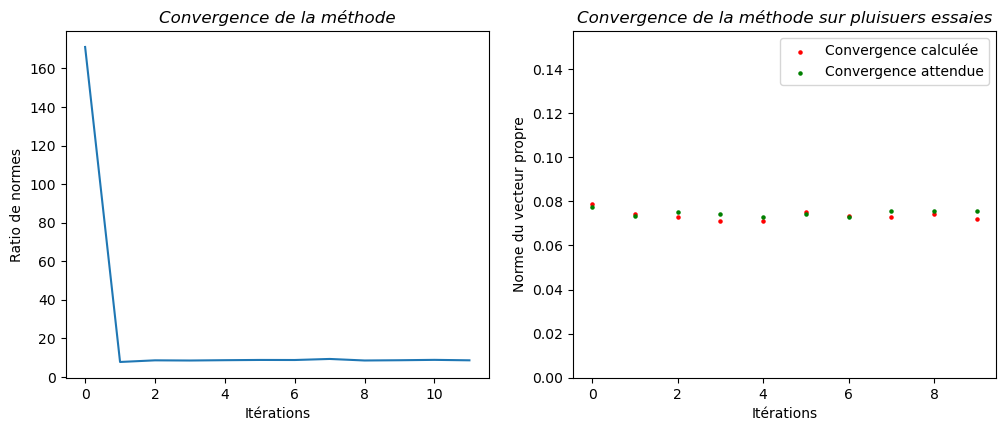

12


In [25]:
convergences_calculees = []
convergences_attendues = []
for i in range(10): 
    web_matrix = web_matrix = np.random.choice([0, 1], size=(N, N), p=[0.8, 0.2])
    np.fill_diagonal(web_matrix, 0)
    valp, vecp, Xf, Xs, k = power_method_2(correct_matrix(web_matrix, alpha=0.8), max_iter = 10000, tol = 1e-11, nb_iterations = False)
    valeurs_propres_initiales = np.sort(np.linalg.eigvals(correct_matrix(web_matrix, alpha=0.85)))
    c = Xs[-1]/Xf[-1]
    convergences_calculees.append(c)
    convergences_attendues.append(valeurs_propres_initiales[-2])
    
fig, ax = plt.subplots(1,2,figsize = (12,4.5))

ax[0].plot(range(len(Xf_first)), np.real(np.divide(Xf_first, Xs_first)))
ax[0].set_title("Convergence de la méthode", fontdict={'fontstyle': 'italic'})
ax[0].set_xlabel('Itérations')
ax[0].set_ylabel('Ratio de normes')

ax[1].scatter(range(10), convergences_calculees, color='red', s=5, label='Convergence calculée')
ax[1].scatter(range(10), convergences_attendues, color='green', s=5, label='Convergence attendue')
ax[1].set_title("Convergence de la méthode sur pluisuers essaies", fontdict={'fontstyle': 'italic'})
ax[1].set_xlabel('Itérations')
ax[1].set_ylabel('Norme du vecteur propre')
ax[1].set_ylim(0,np.max(np.maximum(convergences_calculees, convergences_attendues)*2))
ax[1].legend()

plt.show()
print(len(Xf_first))